In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
train_df=pd.read_excel('C:/Users/Mahesh/Downloads/Test_set.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
test_df=pd.read_excel("C:/Users/Mahesh/Downloads/Data_Train.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
final_df=train_df.append(test_df)
final_df.head()

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_29960\2632932177.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN


In [10]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753.0


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [12]:
final_df['Date_of_Journey'].str.split('/').str[0]

0         6
1        12
2        21
3        21
4        24
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 13354, dtype: object

In [14]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [15]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN,12,05,2019


In [16]:
  df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

NameError: name 'df' is not defined

In [17]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [19]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN,24,6,2019
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,NaN,12,6,2019
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info,NaN,12,3,2019
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info,NaN,1,5,2019
8,IndiGo,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info,NaN,15,3,2019
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info,NaN,18,5,2019


In [21]:
final_df['Arrival_Time'].str.split(' ').str[0]

0        04:25
1        10:20
2        19:00
3        21:00
4        02:45
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [22]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,NaN,6,6,2019,04,25


In [23]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,NaN,6,6,2019,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,NaN,12,5,2019,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,NaN,21,5,2019,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,NaN,21,5,2019,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,NaN,24,6,2019,2,45


In [24]:
final_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops', nan],
      dtype=object)

In [25]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
9039,Air India,Delhi,Cochin,NaN,09:45,23h 40m,NaN,No info,7480.0,6,5,2019,9,25


In [26]:
final_df.drop('Route',axis=1,inplace=True)

final_df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,17:30,10h 55m,1 stop,No info,NaN,6,6,2019,4,25
1,IndiGo,Kolkata,Banglore,06:20,4h,1 stop,No info,NaN,12,5,2019,10,20
2,Jet Airways,Delhi,Cochin,19:15,23h 45m,1 stop,In-flight meal not included,NaN,21,5,2019,19,0
3,Multiple carriers,Delhi,Cochin,08:00,13h,1 stop,No info,NaN,21,5,2019,21,0
4,Air Asia,Banglore,Delhi,23:55,2h 50m,non-stop,No info,NaN,24,6,2019,2,45


In [27]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports', '1 Short layover', 'No Info', 'Red-eye flight',
       '2 Long layover'], dtype=object)

In [29]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,duration_hour
2660,Air India,Mumbai,Hyderabad,16:50,5m,2 stops,No info,NaN,12,3,2019,16,55,5m
6474,Air India,Mumbai,Hyderabad,16:50,5m,2 stops,No info,17327.0,6,3,2019,16,55,5m


In [30]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)
final_df['duration_hour']=final_df['duration_hour'].astype('int')
final_df.drop('Duration',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,duration_hour
0,Jet Airways,Delhi,Cochin,17:30,1 stop,No info,NaN,6,6,2019,4,25,10


In [31]:
pd.get_dummies(final_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,17:30,1 stop,No info,NaN,6,6,2019,4,25,10,...,0,0,1,0,0,1,0,0,0,0
1,06:20,1 stop,No info,NaN,12,5,2019,10,20,4,...,0,0,0,1,0,0,0,0,0,0
2,19:15,1 stop,In-flight meal not included,NaN,21,5,2019,19,0,23,...,0,0,1,0,0,1,0,0,0,0
3,08:00,1 stop,No info,NaN,21,5,2019,21,0,13,...,0,0,1,0,0,1,0,0,0,0
4,23:55,non-stop,No info,NaN,24,6,2019,2,45,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,19:55,non-stop,No info,4107.0,9,4,2019,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,20:45,non-stop,No info,4145.0,27,4,2019,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,08:20,non-stop,No info,7229.0,27,4,2019,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,11:30,non-stop,No info,12648.0,1,3,2019,14,10,2,...,0,0,0,0,0,0,0,0,0,1


In [10]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN


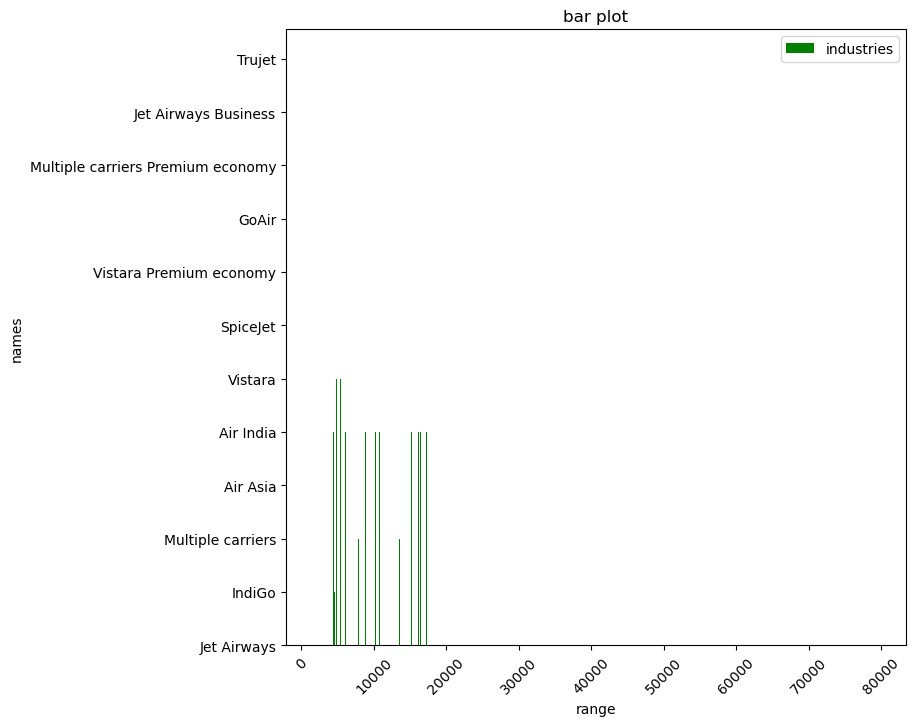

In [15]:
data=final_df['Price']
val=final_df['Airline']
plt.figure(figsize=(8, 8))
plt.bar(data,val,label='industries',color='g')
plt.legend()
plt.xlabel('range')
plt.ylabel('names')
plt.title('bar plot')
plt.xticks(rotation=45) 
plt.show()

ValueError: could not convert string to float: 'Jet Airways'

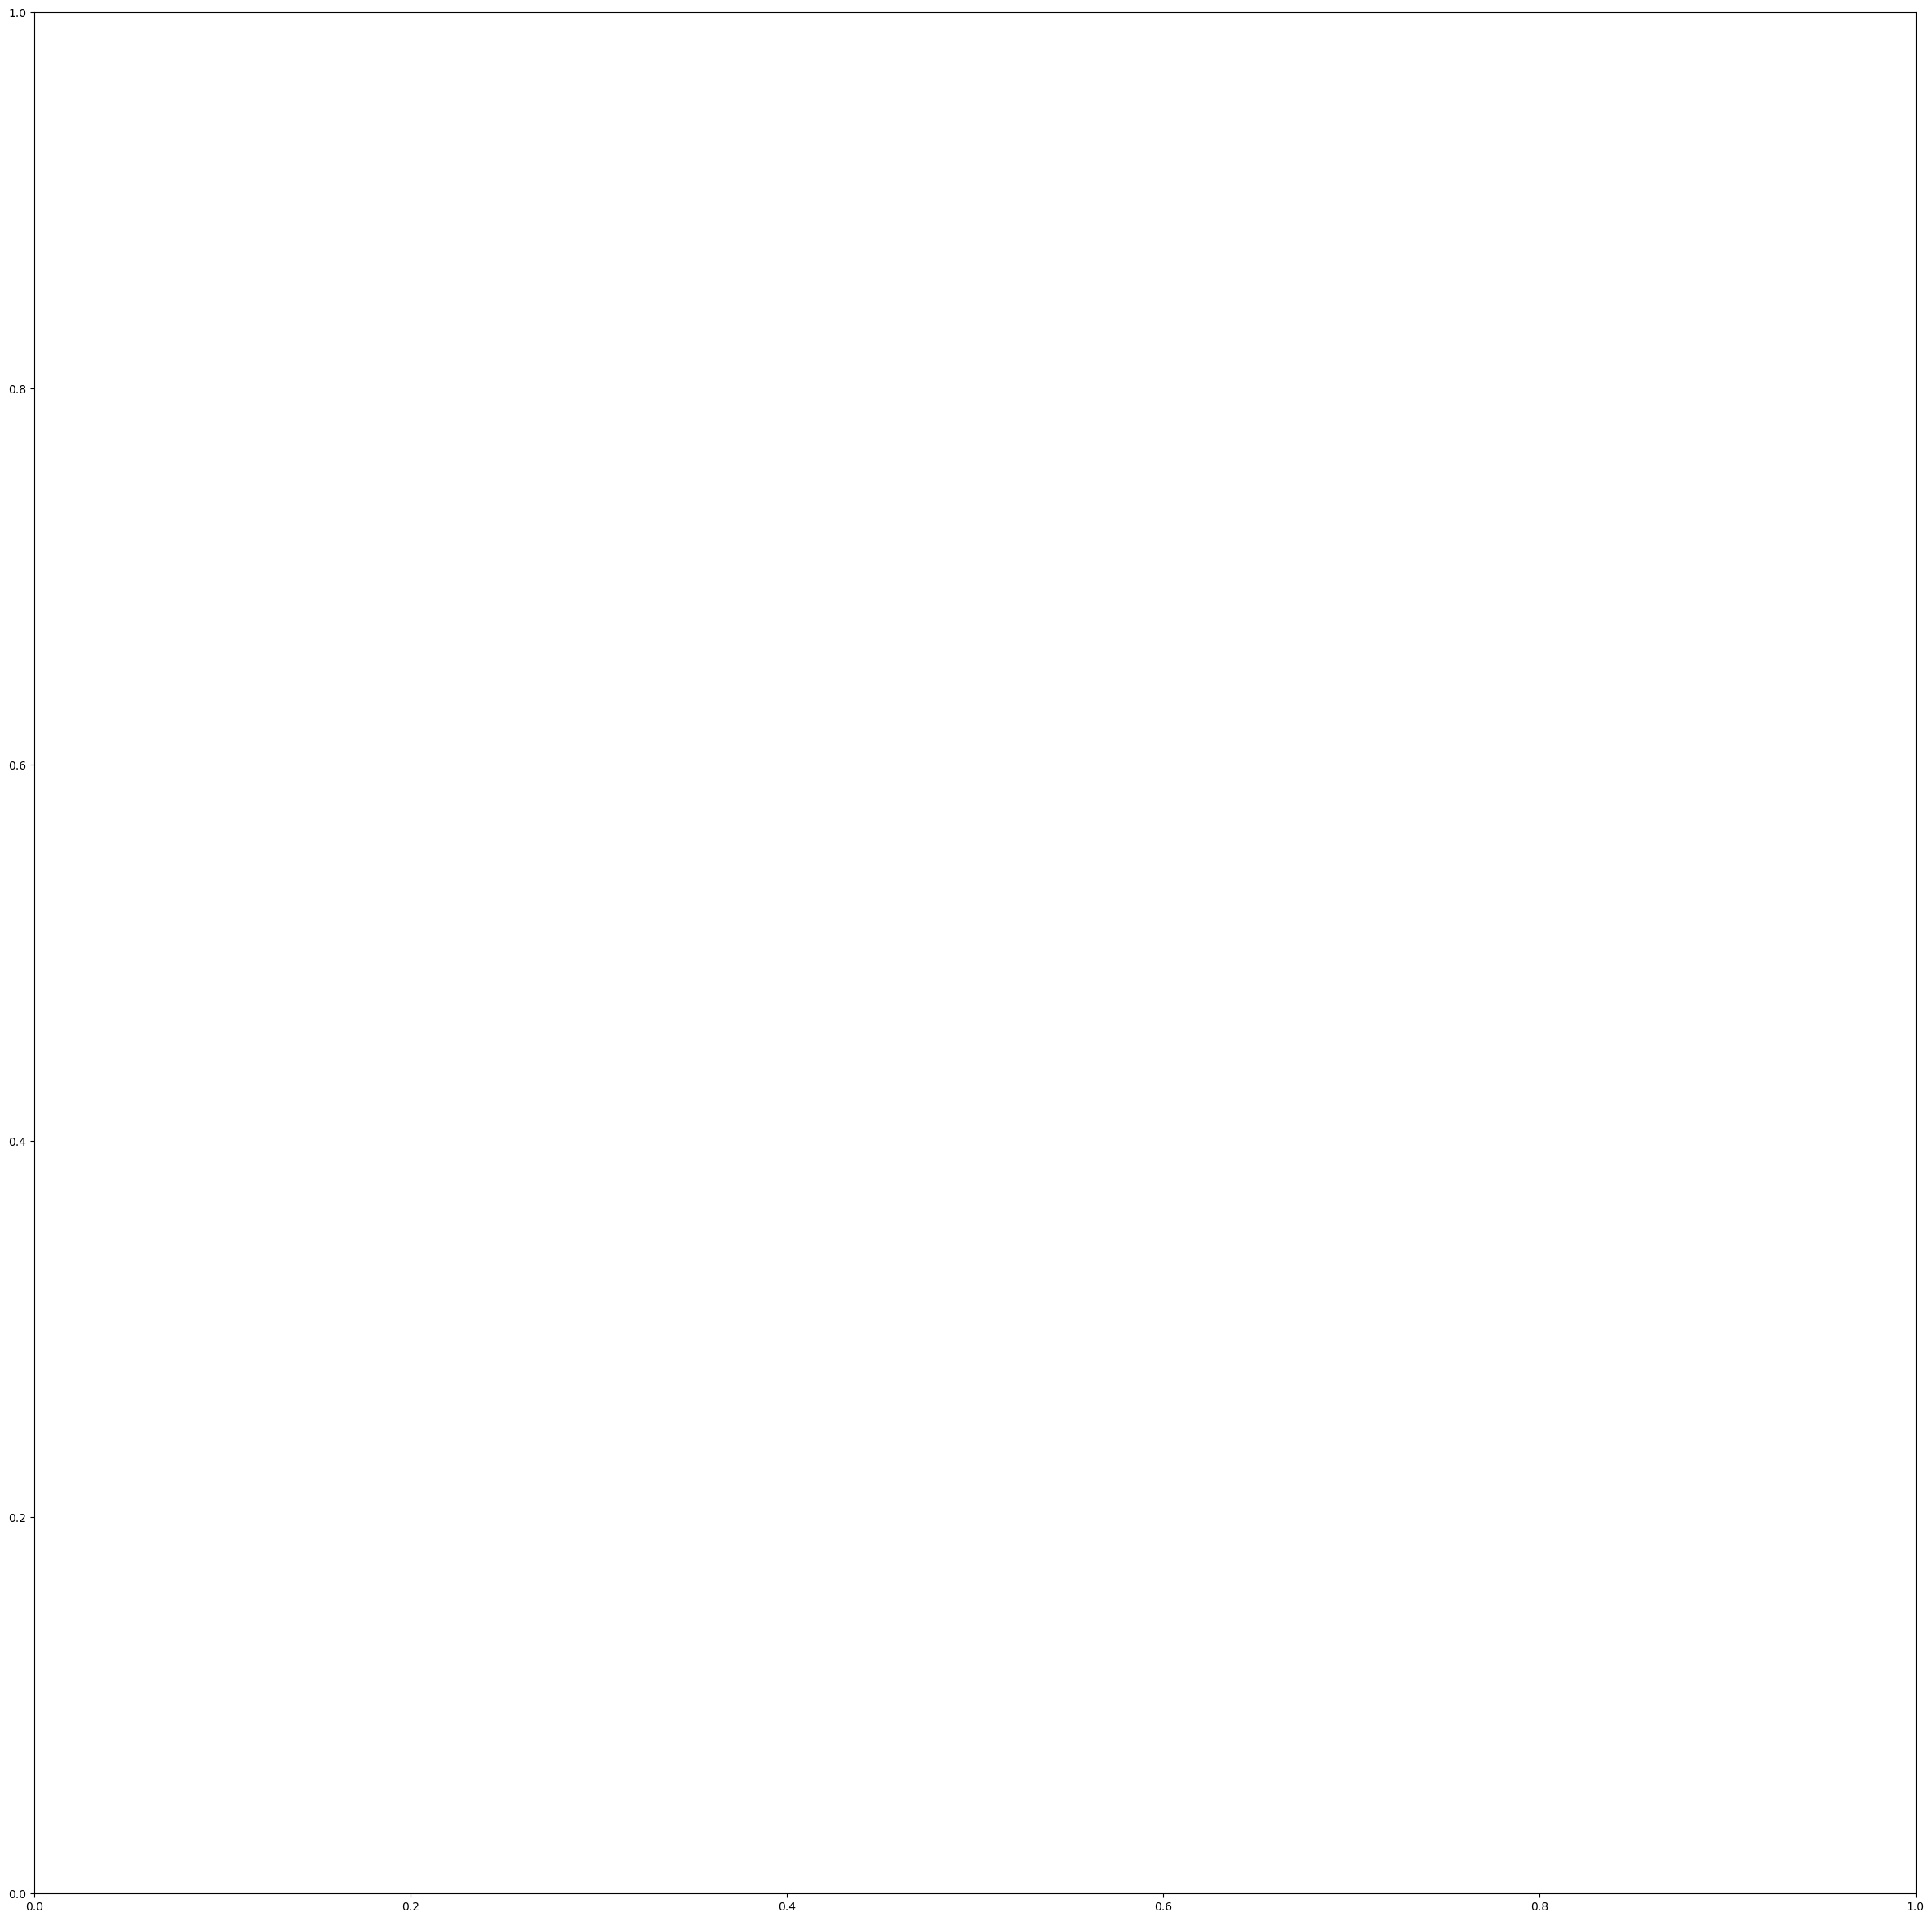

In [19]:
plt.figure(figsize=(30, 30))
plt.pie(val, labels=data,startangle=90,shadow=True, autopct='%1.1f%%')
plt.title('pie chart')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'reshape'